In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datos = pd.read_csv('/home/franco/Desktop/events.csv')

/home/franco/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


visited site    26898
Name: event, dtype: int64


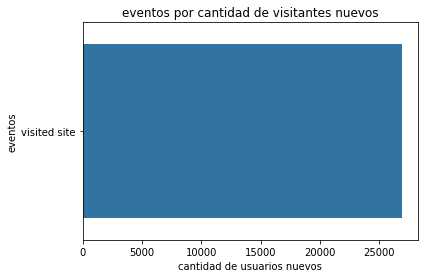

In [3]:
#cuantos usuarios nuevos hay por evento

new = datos[datos["new_vs_returning"] == "New"]["event"].value_counts()
print(new)
plot1 = sns.barplot(x=new.values,y=new.index)
plot1.set(xlabel='cantidad de usuarios nuevos', ylabel='eventos')
plot1.set_title('eventos por cantidad de visitantes nuevos')
plt.show(plot1)

/home/franco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/franco/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


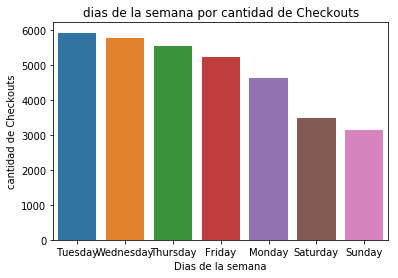

In [4]:
#checkouts por semana

out = datos[datos["event"] == "checkout"]
out['timestamp']=pd.to_datetime(out['timestamp'], format='%Y/%m/%d %H:%M:%S')

out['day'] = out['timestamp'].dt.weekday_name
out=out.sort_values(['day'])

g = sns.countplot(x='day',data=out,order=out['day'].value_counts().index,orient='v')
g.set(xlabel='Dias de la semana', ylabel='cantidad de Checkouts')
g.set_title('dias de la semana por cantidad de Checkouts')
plt.show(g)

visited site    60480
Name: event, dtype: int64


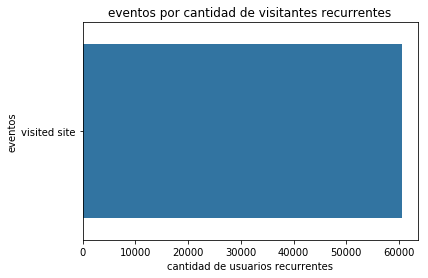

In [4]:
#cuantos usuarios recurrentes hay por evento

returning = datos[datos["new_vs_returning"] == "Returning"]["event"].value_counts()
print(returning)
plot2 = sns.barplot(x=returning.values,y=returning.index)
plot2.set(xlabel='cantidad de usuarios recurrentes', ylabel='eventos')
plot2.set_title('eventos por cantidad de visitantes recurrentes')
plt.show(plot2)

viewed product       528931
brand listing         98635
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64


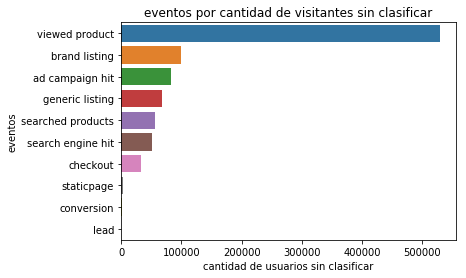

In [5]:
#cuantos usuarios sin clasificar hay por evento

otros = datos[datos["new_vs_returning"].isnull()]["event"].value_counts()
print(otros)
plot3 = sns.barplot(x=otros.values,y=otros.index)
plot3.set(xlabel='cantidad de usuarios sin clasificar', ylabel='eventos')
plot3.set_title('eventos por cantidad de visitantes sin clasificar')
plt.show(plot3)

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64


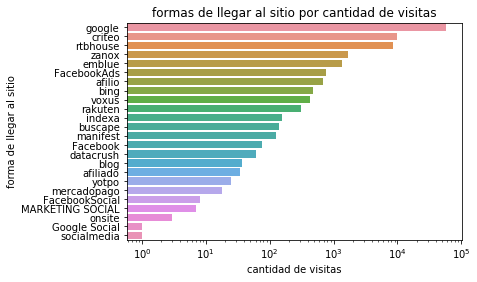

In [6]:
#como llegan al sitio los usuarios

camp = datos["campaign_source"].value_counts()
print(camp)
plot4 = sns.barplot(x=camp.values,y=camp.index)
plot4.set_xscale('log')
plot4.set(xlabel='cantidad de visitas', ylabel='forma de llegar al sitio')
plot4.set_title('formas de llegar al sitio por cantidad de visitas')
plt.show(plot4)

iPhone 6                  47538
iPhone 5s                 42045
iPhone 6S                 36930
iPhone 7                  26330
Samsung Galaxy S7 Edge    23062
Samsung Galaxy S7         18085
iPhone 7 Plus             17853
iPhone SE                 15874
Samsung Galaxy S8         15868
iPhone 6S Plus            12250
Name: model, dtype: int64


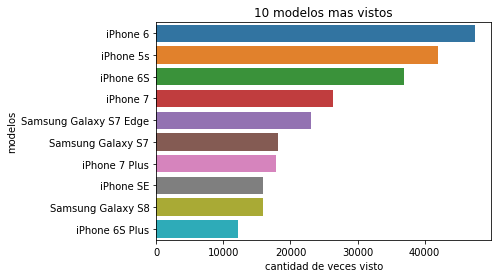

In [7]:
#cuales son los 10 modelos mas vistos

viewed = datos[datos["event"] == "viewed product"]["model"].value_counts().head(10)
print(viewed)
plot5 = sns.barplot(x=viewed.values,y=viewed.index)
plot5.set(xlabel='cantidad de veces visto', ylabel='modelos')
plot5.set_title('10 modelos mas vistos')
plt.show(plot5)

iPhone 6                   3295
iPhone 5s                  2744
iPhone 6S                  2308
Samsung Galaxy J5          1918
Samsung Galaxy S7          1234
iPhone 7                   1205
Samsung Galaxy S8          1074
iPhone 7 Plus               924
Samsung Galaxy J7 Prime     866
Samsung Galaxy S6 Flat      844
Name: model, dtype: int64


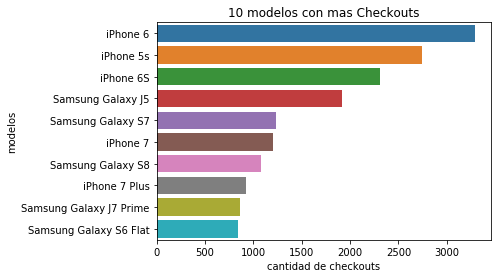

In [8]:
#cuales son los 10 productos mas comprados

chek = datos[datos["event"] == "checkout"]["model"].value_counts().head(10)
print(chek)
plot6 = sns.barplot(x=chek.values,y=chek.index)
plot6.set(xlabel='cantidad de checkouts', ylabel='modelos')
plot6.set_title('10 modelos con mas Checkouts')
plt.show(plot6)

Preto             124020
Dourado           105852
Cinza espacial     62274
Branco             51086
Prateado           48279
Ouro Rosa          31412
Prata              17554
Rosa               16036
Preto Matte        14953
Azul                8345
Name: color, dtype: int64


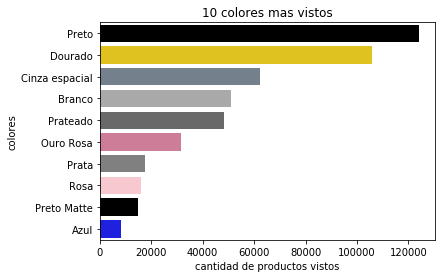

In [42]:
#los 10 colores mas vistos

color = datos[datos["event"] == "viewed product"]["color"].value_counts().head(10)
print(color)
clrs=['black','gold','slategrey','darkgrey','dimgrey','palevioletred','grey','pink','k','blue']
plot7 = sns.barplot(x=color.values,y=color.index,palette=clrs)
plot7.set(xlabel='cantidad de productos vistos', ylabel='colores')
plot7.set_title('10 colores mas vistos')
plt.show(plot7)

Preto             8572
Dourado           8091
Cinza espacial    3514
Branco            3453
Prateado          2610
Ouro Rosa         1905
Prata              884
Rosa               759
Preto Matte        741
Platinum           492
Name: color, dtype: int64


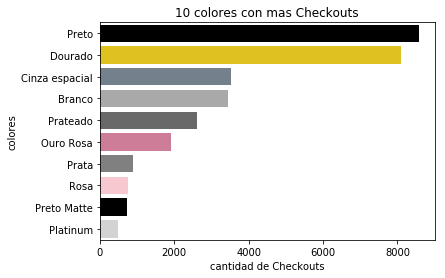

In [43]:
#los 10 colores mas comprados

color2 = datos[datos["event"] == "checkout"]["color"].value_counts().head(10)
print(color2)
clrs=['black','gold','slategrey','darkgrey','dimgrey','palevioletred','grey','pink','k','lightgrey']
plot8 = sns.barplot(x=color2.values,y=color2.index,palette=clrs)
plot8.set(xlabel='cantidad de Checkouts', ylabel='colores')
plot8.set_title('10 colores con mas Checkouts')
plt.show(plot8)


iPhone 6                  12598
iPhone 6S                 12363
iPhone 5s                  9774
iPhone 7                   8151
iPhone 7 Plus              7667
Samsung Galaxy S7 Edge     6872
iPhone SE                  5507
Samsung Galaxy S8          5187
Samsung Galaxy S7          5069
iPhone 6S Plus             3890
Name: model, dtype: int64


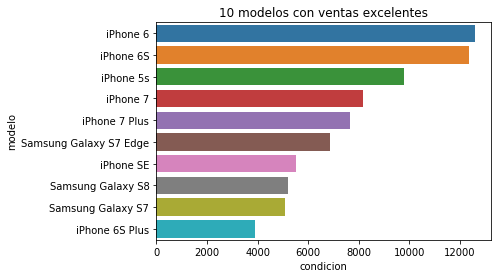

In [11]:
#condicion de venta Excelente por modelo

exc = datos[datos["condition"] == "Excelente"]["model"].value_counts().head(10)
print(exc)
plot9 = sns.barplot(x=exc.values,y=exc.index)
plot9.set(xlabel='condicion', ylabel='modelo')
plot9.set_title('10 modelos con ventas excelentes')
plt.show(plot9)

Iphone           1207
Iphone 6         1057
iPhone 6         1005
iphone 6          932
iphone            882
iphone 6s         784
Iphone 6s         736
iPhone 6s         716
Motorola          679
iPhone            638
J7                580
J5                540
Samsung           513
S7                474
iphone 7          428
Iphone 7          412
iPhone 7          371
j7                370
s8                354
S8                346
Iphone 5s         343
iPhone 5s         339
iphone 5s         315
IPhone 6          315
j5                310
S6                302
s7                289
6s                270
Iphone 6 plus     256
Lg                252
Name: search_term, dtype: int64


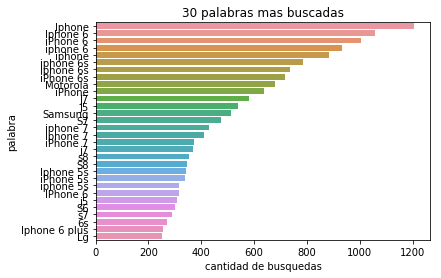

In [12]:
#terminos mas buscados

bus = datos["search_term"].value_counts().head(30)
print(bus)
plot10 = sns.barplot(x=bus.values,y=bus.index)
plot10.set(xlabel='cantidad de busquedas', ylabel='palabra')
plot10.set_title('30 palabras mas buscadas')
plt.show(plot10)

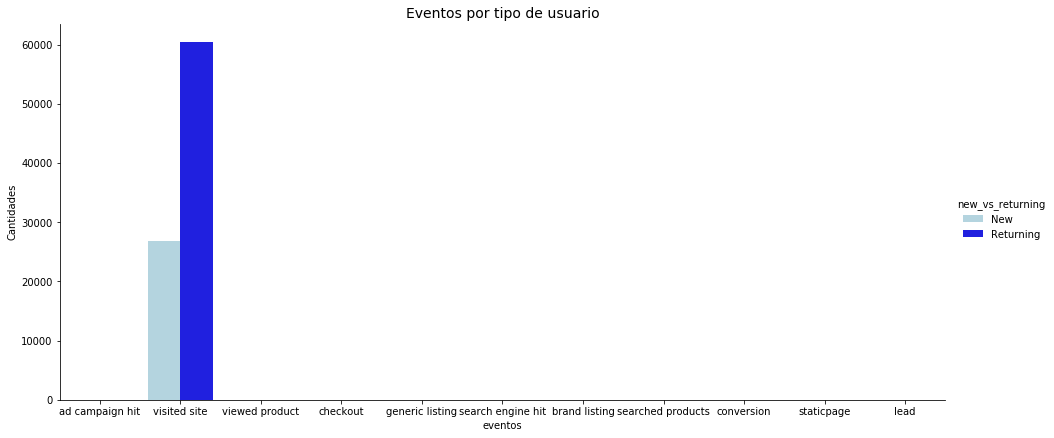

In [34]:
#cantidad de usuarios nuevos y recurrentes por evento
clrs=['lightblue','blue']
graph = sns.catplot(x="event",hue="new_vs_returning",data=datos,kind="count",palette=clrs,height=6,aspect=2.2)
(graph.set_axis_labels("eventos", "Cantidades")\
     .set_titles("{col_name} {col_var}", fontsize = 12))
plt.title('Eventos por tipo de usuario', fontsize = 14)
plt.show(graph)